In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [5]:
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


In [36]:
df_skill_lists = df_skills.copy()

In [ ]:
for row in df_skill_lists.itertuples():
    for skill in row.job_skills:
        df_skill_lists[skill] = df_skill_lists['job_skills'].apply(lambda x: skill in x)
        df_skill_lists[skill] = df_skill_lists[skill].astype(int)
        
df_skill_lists.loc['Total'] = df_skill_lists.sum(numeric_only=True)
    
df_skill_lists.iloc[:, 2:]

,excel,sql,python,r,aws,airflow
0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,1.0
Total,1.0,1.0,3.0,1.0,1.0,1.0


In [37]:
df_skill_lists.explode('job_skills')

,job_title_short,job_skills
0,Data Analyst,excel
0,Data Analyst,sql
0,Data Analyst,python
1,Data Scientist,python
1,Data Scientist,r
2,Data Engineer,aws
2,Data Engineer,python
2,Data Engineer,airflow


<Axes: xlabel='job_skills'>

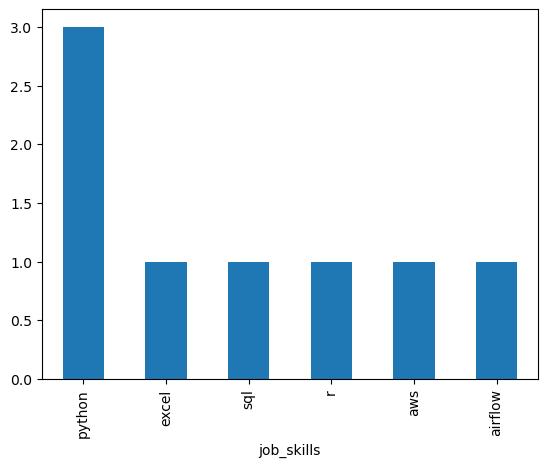

In [39]:
df_skill_lists.explode('job_skills')['job_skills'].value_counts().plot(kind='bar')

In [42]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

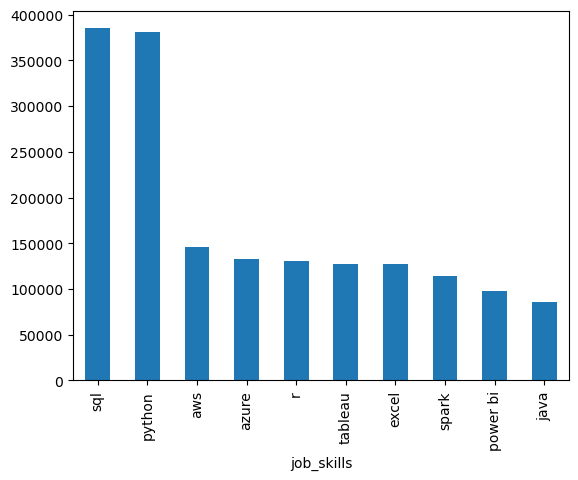

In [46]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [69]:
series_skills_count = df_exploded.groupby(by=['job_title_short','job_skills']).size()

In [70]:
series_skills_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [71]:
df_skills_count = series_skills_count.reset_index(name='skill_count') 


In [74]:
df_skills_count = df_skills_count.sort_values(by=('skill_count'),ascending=False)

In [75]:
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [104]:
job_title = 'Data Engineer'
top_skills = 15
df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

In [105]:
df_skills_final

,job_title_short,job_skills,skill_count
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
686,Data Engineer,aws,62049
687,Data Engineer,azure,60674
860,Data Engineer,spark,53656
763,Data Engineer,java,35559
770,Data Engineer,kafka,29073
755,Data Engineer,hadoop,28815
848,Data Engineer,scala,28716
712,Data Engineer,databricks,27477


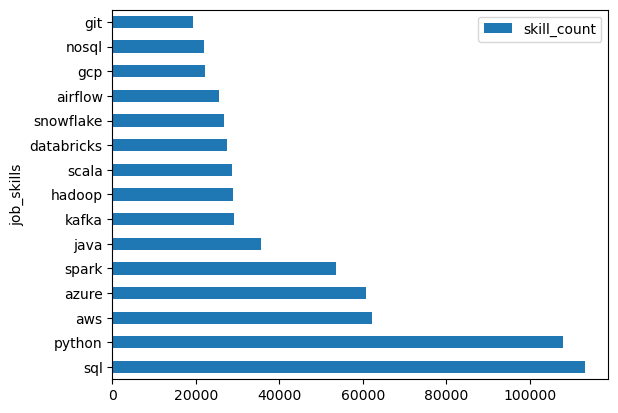

In [106]:
df_skills_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.show()

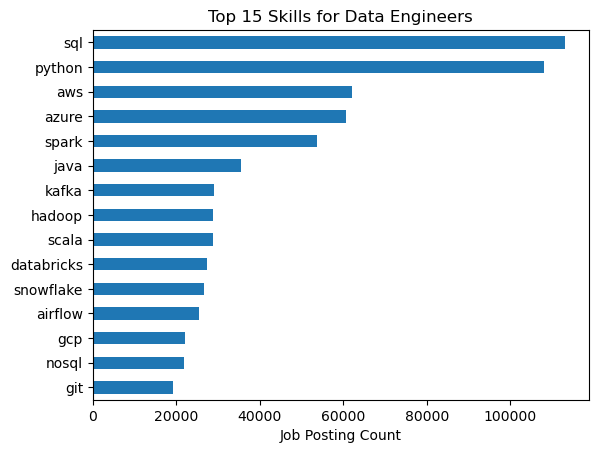

In [111]:
df_skills_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title(f"Top {top_skills} Skills for {job_title}s")
plt.ylabel("")
plt.xlabel("Job Posting Count")
plt.legend().set_visible(False)
plt.show()
